<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="ffffff">
Testt model

</font>
</h1>

In [16]:
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
import numpy as np
import os

In [3]:
model = keras.models.load_model(r"E:\projectDataset\models\8fruit_disease_classifier_resnet_FT.h5")


In [4]:
test_ds = ['sl_trainBeans_Angular_LeafSpot',
 'sl_trainBeans_Rust',
 'sl_trainStrawberry_Angular_LeafSpot',
 'sl_trainStrawberry_Anthracnose_Fruit_Rot',
 'sl_trainStrawberry_Blossom_Blight',
 'sl_trainStrawberry_Gray_Mold',
 'sl_trainStrawberry_Leaf_Spot',
 'sl_trainStrawberry_Powdery_Mildew_Fruit',
 'sl_trainStrawberry_Powdery_Mildew_Leaf',
 'sl_trainTomato_Blight',
 'sl_trainTomato_Leaf_Mold',
 'sl_trainTomato_Spider_Mites']

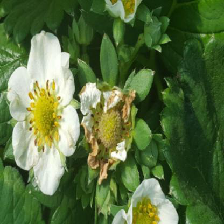

sl_trainStrawberry_Powdery_Mildew_Fruit
[0.07494241 0.03902631 0.06595635 0.1100745  0.04828836 0.06300422
 0.12054922 0.1553762  0.0609916  0.10624422 0.07994007 0.07560658]


In [10]:
img = load_img(r"E:\projectDataset\archive\sl_valid\sl_validStrawberry_Blossom_Blight\sl_validstrawberry_blossom_blight (4).jpg", target_size = (224,224))
display(img)
img= img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
pred = model.predict(img)
predicted_index = np.argmax(pred[0])
class_labels = test_ds
print(class_labels[predicted_index])
print(pred[0])

Found 1166 images belonging to 12 classes.


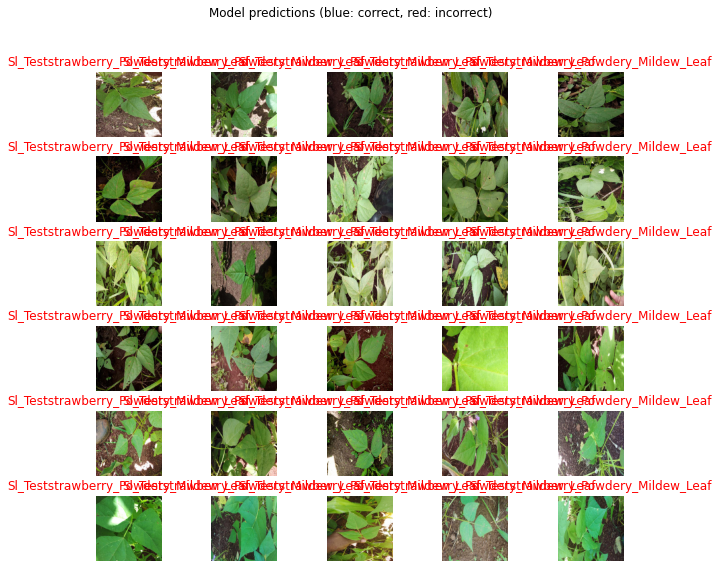

In [21]:
import tensorflow as tf
#import numpy as np
import matplotlib.pyplot as plt

#model = tf.keras.models.load_model(r"E:\projectDataset\models\8fruit_disease_classifier_resnet_FT.h5")

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

IMAGE_RES = 224
BATCH_SIZE = 32

test_generator = test_datagen.flow_from_directory(
        r"E:\projectDataset\archive\sl_test",
        target_size=(IMAGE_RES, IMAGE_RES),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)

predicted_batch = model.predict(test_generator)
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(test_generator.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]

image_batch, label_batch = test_generator.next()


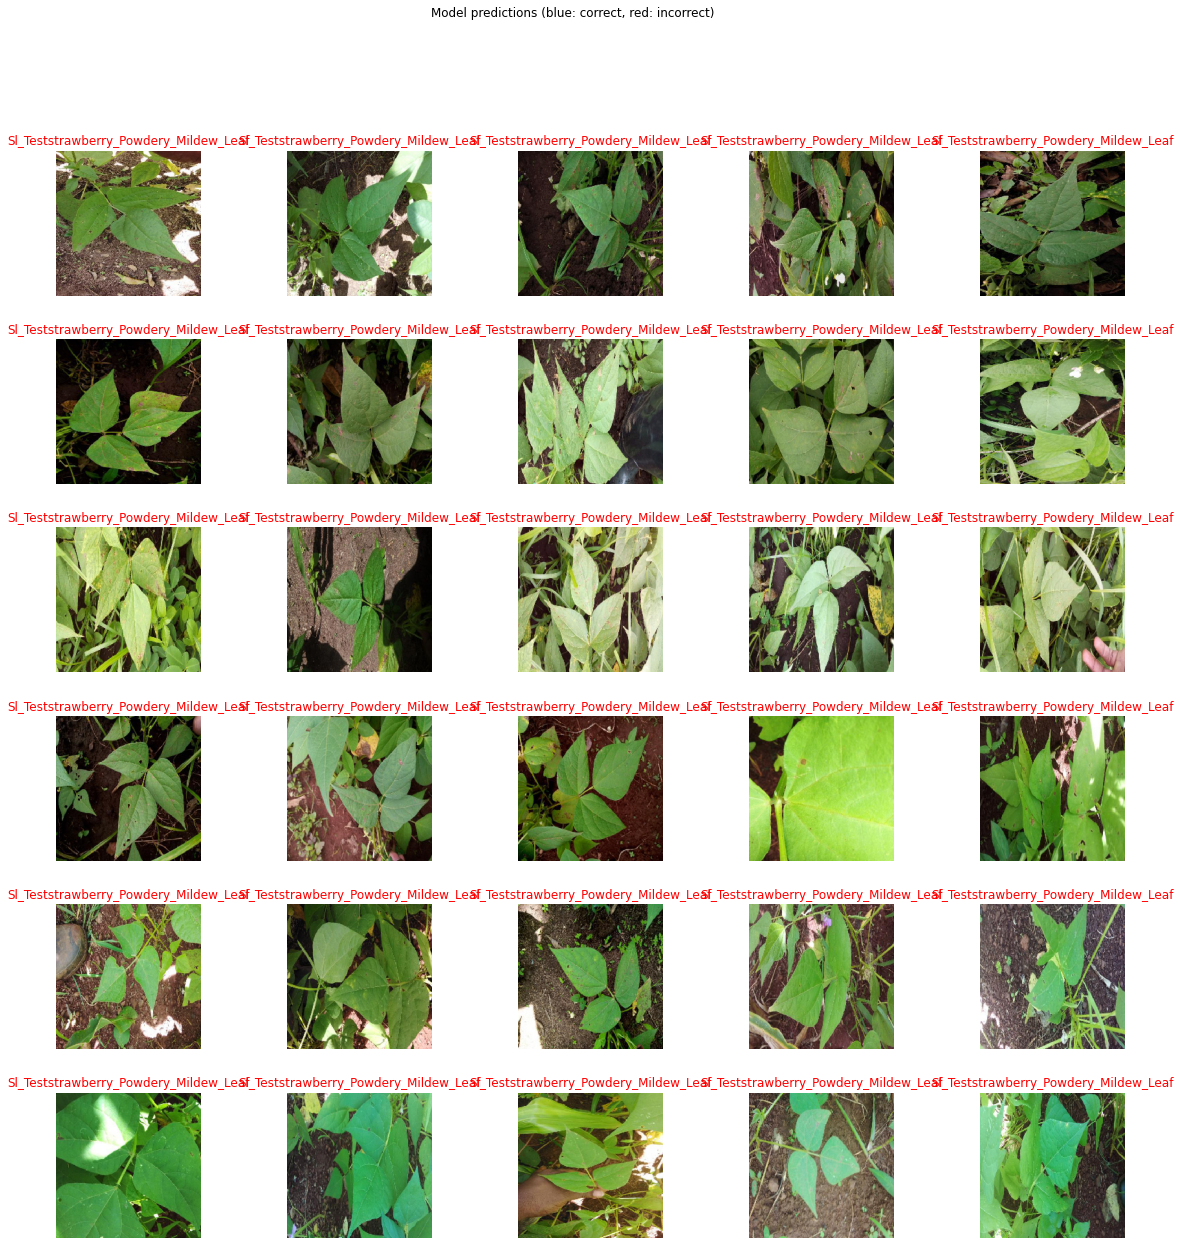

In [22]:

plt.figure(figsize=(20,20))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == np.argmax(label_batch[n]) else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

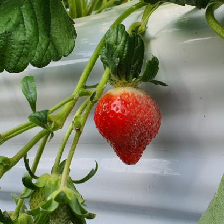

sl_trainStrawberry_Leaf_Spot
[0.0681667  0.03567245 0.06104689 0.12410885 0.04438263 0.06026737
 0.15322489 0.13326392 0.0583356  0.10941159 0.07133973 0.08077934]


In [8]:
img = load_img(r"E:\projectDataset\archive\sl_train\sl_trainStrawberry_Powdery_Mildew_Fruit\sl_trainstrawberry_powdery_mildew_fruit (15).jpg", target_size = (224,224))
display(img)
img= img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
pred = model.predict(img)
predicted_index = np.argmax(pred[0])
class_labels = test_ds
print(class_labels[predicted_index])
print(pred[0])